Team members:
1. Deepan Chakravarthi Padmanabhan
2. Jaswanth Bandlamudi
3. Raghuvir Shirodkar

# Tensorflow Keras Image Classification using Convolution Neural Network


In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

tf.keras.backend.clear_session()  # For easy reset of notebook stat
print(tf.__version__)

1.14.0


## Sample network and training on MNIST dataset

Below is a sample code from the tensorflow keras library to model a cnn architecture, training it with a dataset and running inference.

Please go through it and try to understand the different classes and functions available in tensorflow keras to model a cnn architecture.



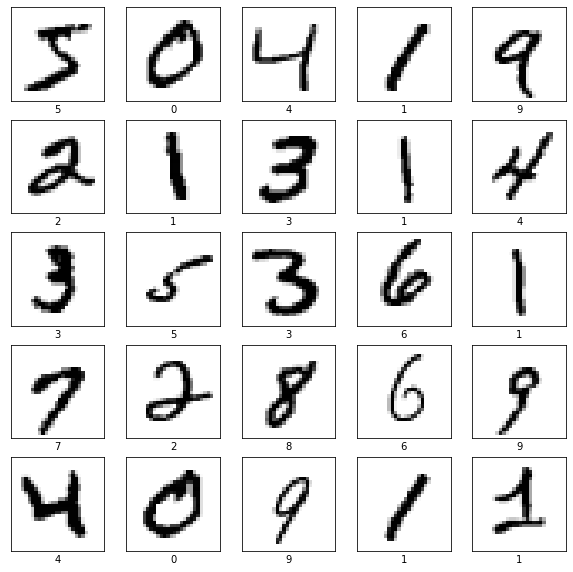

In [19]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Looking at the shapes of each set
# print(train_images.shape, train_labels.shape,test_images.shape, test_labels.shape)

# Reshaping the train images
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
# 60000,28,28,1
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

#Normalization
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

# Get an image from the train set
one = train_images[3]
# Visualize the image
# plt.imshow(one.reshape((28,28)),cmap=plt.cm.binary)

# To plot first 25 images in the trainset
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


In [20]:
inputs = tf.keras.Input(shape=(28,28,1), name='img')
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
# Output shape- 'None' is the number of samples
# Number of parameters = kernelsize**2 x number of filters + number of filter biases
# # params = 9 x 32 + 32 = 320
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=0.5)(x)
outputs = tf.keras.layers.Dense(units=10, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs, name='vanila cnn')
model.summary()
tf.keras.utils.plot_model(model, 'vanilla_cnn.png', show_shapes=True)


Model: "vanila cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [4]:

#y_train = tf.keras.utils.to_categorical(y_train, 10)
#y_test = tf.keras.utils.to_categorical(y_test, 10)

model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
_history = model.fit(train_images, train_labels,
          validation_data=(test_images, test_labels),
          batch_size=64,
          epochs=10,
          validation_split=0.2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 265us/sample - loss: 1.3803 - acc: 0.5126 - val_loss: 0.8719 - val_acc: 0.6910
Epoch 2/10
60000/60000 [==============================] - 15s 256us/sample - loss: 0.7190 - acc: 0.7642 - val_loss: 0.5087 - val_acc: 0.8379
Epoch 3/10
60000/60000 [==============================] - 16s 259us/sample - loss: 0.4964 - acc: 0.8452 - val_loss: 0.3822 - val_acc: 0.8826
Epoch 4/10
60000/60000 [==============================] - 16s 260us/sample - loss: 0.3807 - acc: 0.8824 - val_loss: 0.2623 - val_acc: 0.9166
Epoch 5/10
60000/60000 [==============================] - 16s 261us/sample - loss: 0.3181 - acc: 0.9017 - val_loss: 0.3419 - val_acc: 0.8888
Epoch 6/10
60000/60000 [==============================] - 16s 262us/sample - loss: 0.2694 - acc: 0.9178 - val_loss: 0.1699 - val_acc: 0.9479
Epoch 7/10
60000/60000 [==============================] - 16s 259us/sample - loss: 0.2336 - acc: 0.9294 

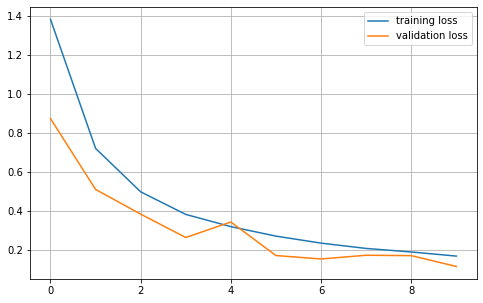

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(_history.history['loss'], label='training loss')
plt.plot(_history.history['val_loss'],label='validation loss')
plt.legend()
plt.grid()


## Questions: Understanding Tensorflow Keras API  [2x5 = 10 points]

* What does "?" signify in the network diagram or None in the the model summary?


* The None in the model summary signify the number of samples at the input.
* In the img(first) layer it represents the number of images in the trainset during training the network.
* While training in batches the None is the batch size of the particular batch.

* Why does layer conv2d_19 (Conv2D)  have 2 dimension less than the upper layer?

In the scenario given,

Kernel size, K =3

Input image size for 1 image, W = 28 (28 x 28 x 1 )

Pad, P = 0

Stride, S = 1

The convolution arithematic to calculate the output image size, O is given below:

$$O = \frac{W-K+2P}{S} +1 $$

$$O = \frac{28 - 3 + 2\times 0 }{1}+ 1$$
$$\implies 26$$

Therefore, the output image size at conv2d_19 for 1 filter is 26 x 26 x 1 and the layer output is summarized as (?, 26,26,32) where 32 is the number of filters in the layer.



* what is stride?


* Stride controls the number of steps the filter kernel move over the input volume. It is the amount by which the filter shifts on the input feature map.
* Stride is chosen in such a way the output volume is an integer and not a fraction.
* The stride of convolving a filter over input feature map can be adjusted which has an effect both on how the filter is applied to the image and, in turn, the size of the resulting feature map.

* Difference between MaxPooling2D and GlobalAveragePooling2D ?

Maxpooling 2D:
* This type of pooling uses a filter of size 2x2 and a stride of the same length. It applies the filter to each individual input feature maps and outputs the maximum number in every subregion that the filter convolves around.
* It is useful when the background of the image is dark and we are interested in only the lighter pixels of the image. For example: in MNIST dataset, the digits are represented in white color and the background is black.
* Input image size -> (4,4,3): Maxpool2D output with stide 2 (2x2 filter) -> (2,2,3)

Global Averagepooling 2D:

* Global Average Pooling is an operation that calculates the average output of each feature map in the previous layer. This fairly simple operation reduces the data significantly and prepares the model for the final classification layer. It also has no trainable parameters. 
* It is more meaningful and interpretable as it enforces correspondance between feature maps and categories.
* It is itself a structural regularizer, which natively prevents overfitting for the overall structure.
* Input image size -> (4,4,3): Global avergae pooling2D output -> (1,3)

* What is sparse_categorical_crossentropy loss function ?

Cross entropy loss given by:

\begin{equation}
C E=-\sum_{i}^{C} t_{i} \log \left(s_{i}\right)
\end{equation}

where $t_i$ and $s_i$ are the groundtruth and the CNN score for each class i in C. An activation function is used to score before the CE loss computation. Categorical corss entropy loss utilizes a softmax activation with a cross-entropy loss and used in multiclass classification problem.

A possible cause of frustration when using cross-entropy with multiclass classification problems with a large number of labels is the one hot encoding process.

For example, predicting words in a vocabulary may have tens or hundreds of thousands of categories, one for each label. This can mean that the target element of each training example may require a one hot encoded vector with tens or hundreds of thousands of zero values, requiring significant memory.

**Sparse cross-entropy** addresses this by performing the same cross-entropy calculation of error, without requiring that the target variable be one hot encoded prior to training. Sparse refers to using a single integer from zero to the number of classes minus one (e.g. { 0; 1; or 2 } for a class label for a three-class problem), instead of a dense one-hot encoding of the class label (e.g. { 1,0,0; 0,1,0; or 0,0,1 } for a class label for the same three-class problem). 

Reference: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

# Build different convolutions in Numpy

In the questions below you will learn the workings of different convolution network by implementing them in python numpy.

There are different kinds of convolution which has been implemented in different neural architectures. The most popular ones are :

1. Simple Convolution
2. Atrous Convolution
3. Depth wise Convolution
4. Point wise Convolution
5. Depth wise separable Convolution

Good summary can be found here
[convolutions-types]( https://ikhlestov.github.io/pages/machine-learning/convolutions-types/). 

The task is to read about them and implement them using numpy

In [21]:
# Helper functions
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3).astype('float32')

train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

one = train_images[3]
def plot_convolution_images(image, convoled_image):
        
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title("Image")
    plt.imshow(image.reshape((32,32,3)))
    plt.subplot(1,2,2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(convoled_image.reshape((32,32)))
    plt.title("Convolution")
    plt.show()

### Sample: Simple Convolution 

Input image shape: (32, 32, 3)
Kernel shape: (3, 3, 3, 64)
Padded image shape: (34, 34, 3)
Convoled image shape: (64, 32, 32)


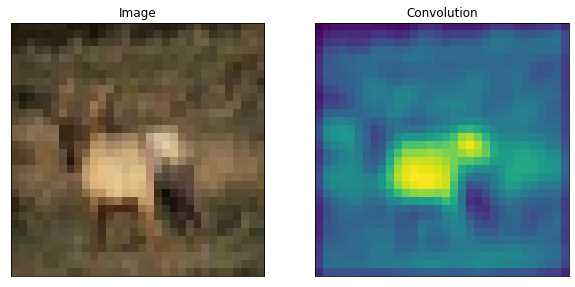

In [22]:
import numpy as np

def myConv2D(image: np.ndarray, 
             filter_size: int, 
             kernel_size: int):
    """
    myConv2D convolutions.
    Args:
        image: (hi, wi, cin).
        filter_size: (fs). The number of output filters
        kernel_size: (ks)
    Returns:
        (fs, hi, wi)
    """
    print("Input image shape:",image.shape)
    kernels = np.random.rand(kernel_size, kernel_size, image.shape[-1], filter_size )
    # Filter size is the number of filters.
    print("Kernel shape:", kernels.shape)
    
    out = np.zeros([filter_size, image.shape[0], image.shape[1]])
    
    pad = kernel_size // 2
    image_padded = np.pad(image, [(pad,), (pad,), (0,)], 'constant')
    print("Padded image shape:", image_padded.shape)
    
    # for each filter
    for idx_c_out in range(filter_size):
        
        # Select the particular row of patch in the image
        for idx_row in range(image.shape[0]):
            
            # Select the particular column of patch in the image
            for idx_col in range(image.shape[1]):
                
                # Get the kernel random initialized values corresponding to the filter
                kernel = kernels[:, :, :, idx_c_out]
                
                # Select the patch on the image area where the kernel is overlapping
                patch = image_padded[idx_row: idx_row + kernel_size, idx_col: idx_col + kernel_size]
                
                # Do 3D convolution
                out[idx_c_out, idx_row, idx_col] += (kernel * patch).sum()
                
    print ("Convoled image shape:",out.shape)
    return out

# Create inputs
#image = np.random.rand(28, 28, 1).astype(np.float32)
kernel_size = 3
filters = 64
convolved = myConv2D(one, filters, kernel_size)
plot_convolution_images(one, convolved[0])

## Question: Extend Simple Convolution to accomodate Atrous/Dilated Convolution in numpy [10 points]

Input image shape (32, 32, 3)
Kernel shape: (7, 7, 3, 64)
Padded image shape: (38, 38, 3)
Convolved image shape (64, 32, 32)


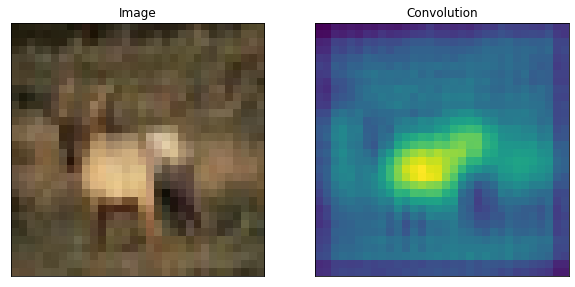

Input image shape (32, 32, 3)
Kernel shape: (11, 11, 3, 64)
Padded image shape: (42, 42, 3)
Convolved image shape (64, 32, 32)


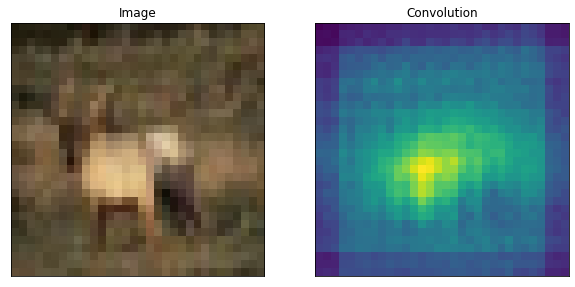

In [52]:
def myConv2DWithDilation(image: np.ndarray, 
             dilation_rate: int, 
             filter_size: int,
             kernel_size: int):
    """
    myConv2D convolutions.
    Args:
        image: (hi, wi, cin)
        dilation_rate: (dr) 
        filter_size: (ds)
        kernel_size: (ks)
    Returns:
        ( ?????Fill this ???? )
    """

    print("Input image shape", image.shape)
    kernels = np.random.rand(kernel_size, kernel_size, image.shape[-1], filter_size )

        
    for i in range(dilation_rate-1):
        kernels = np.insert(kernels, [i+1,i+2],0, axis=1)
        kernels = np.insert(kernels, [i+1,i+2],0, axis=0)

    kernel_pad = dilation_rate - 1
    # Increase kernel receptive field
    kernels = np.pad(kernels, [(kernel_pad,), (kernel_pad,),(0,), (0,)], 'constant')
    print("Kernel shape:", kernels.shape)
    
    out = np.zeros([filter_size, image.shape[0], image.shape[1]])
    
    kernel_size = kernels.shape[0]
    pad = kernel_size // 2
    image_padded = np.pad(image, [(pad,), (pad,), (0,)], 'constant')
    print("Padded image shape:", image_padded.shape)
    
    # for each filter
    for idx_c_out in range(filter_size):
        
        # Select the particular row of patch in the image
        for idx_row in range(image.shape[0]):
            
            # Select the particular column of patch in the image
            for idx_col in range(image.shape[1]):
                
                # Get the kernel random initialized values corresponding to the filter
                kernel = kernels[:, :, :, idx_c_out]
                
                # Select the patch on the image area where the kernel is overlapping
                patch = image_padded[idx_row: idx_row + kernel_size, idx_col: idx_col + kernel_size]
                
                # Do 3D convolution
                out[idx_c_out, idx_row, idx_col] += (kernel * patch).sum()
                

    print("Convolved image shape", out.shape)
    return out

kernel_size = 3
filters = 64
dilation = 2
convolved = myConv2DWithDilation(one, dilation, filters, kernel_size)
plot_convolution_images(one, convolved[0])
dilation = 3
convolved = myConv2DWithDilation(one, dilation, filters, kernel_size)
plot_convolution_images(one, convolved[0])


# https://towardsdatascience.com/understanding-2d-dilated-convolution-operation-with-examples-in-numpy-and-tensorflow-with-d376b3972b25

## Question: Implement a DepthwiseConvolution  in numpy [10 points]

Input image shape (32, 32, 3)
Kernel shape (3, 3, 1, 64)
Padded image shape: (34, 34, 3)
Convolved image shape: (192, 32, 32)


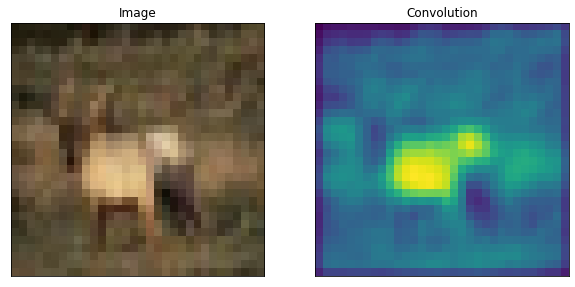

In [11]:
def myDepthWiseConv2D(image: np.ndarray, 
             depth_multiplier: int, 
             kernel_size: int):
    """
    myConv2D convolutions.
    Args:
        image: (hi, wi, cin).
        depth_multiplier: (ds).The number of depthwise convolution output channels for each input channel
        kernel_size: (ks)
    Returns:
        (ds * cin, hi, wi)
    """
    '''
    depth_multiplier: Float multiplier for the depth (number of channels)
    for all convolution ops. The value must be greater than zero. Typical
    usage will be to set this value in (0, 1) to reduce the number of
    parameters or computation cost of the model.
      '''
    
    print("Input image shape", image.shape)
    kernels = np.random.rand(kernel_size, kernel_size, 1, depth_multiplier)
    print("Kernel shape", kernels.shape)
    
    out = np.zeros([depth_multiplier*kernel_size, image.shape[0], image.shape[1]])
    
    kernel_size = kernels.shape[0]
    pad = kernel_size // 2
    image_padded = np.pad(image, [(pad,), (pad,), (0,)], 'constant')
    print("Padded image shape:", image_padded.shape)
    
    # for each filter
    for idx_c_out in range(depth_multiplier):
        
        # Select the particular row of patch in the image
        for idx_row in range(image.shape[0]):
            
            # Select the particular column of patch in the image
            for idx_col in range(image.shape[1]):
                
                # Get the kernel random initialized values corresponding to the filter
                kernel = kernels[:, :, :, idx_c_out]
                
                # Select the patch on the image area where the kernel is overlapping
                patch = image_padded[idx_row: idx_row + kernel_size, idx_col: idx_col + kernel_size]
                
                # Do 3D convolution
                out[idx_c_out, idx_row, idx_col] += (kernel * patch).sum()
                
    
    print("Convolved image shape:", out.shape)
    return out


kernel_size = 3
filters = 64
convolved = myDepthWiseConv2D(one, filters, kernel_size)
plot_convolution_images(one, convolved[0])

## Question: Combine Depthwise and Pointwise and implement a Depthwise Separable Convolution in numpy [10 points]

*** Performing Depthwise convolution ***
Input image shape (32, 32, 3)
Kernel shape (3, 3, 1, 64)
Padded image shape: (34, 34, 3)
Convolved image shape: (192, 32, 32)
Depthwise convolution output shape: (192, 32, 32)

*** Performing Pointwise convolution to the output of depthwise convolution ***
Input image shape (192, 32, 32)
Kernel shape (1, 1, 192, 16)
Padded image shape: (192, 32, 32)
Convolved image shape: (16, 32, 32)
Pointwise convolution output shape: (16, 32, 32)


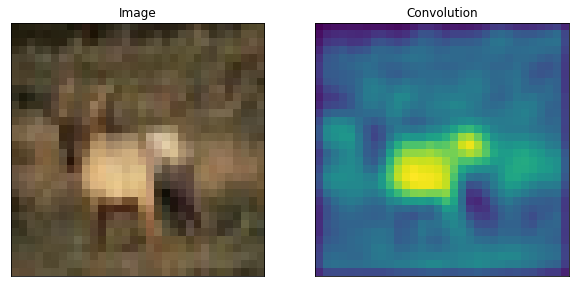

In [12]:
def myPointWiseConv2D(image: np.ndarray,
                              filters_pointwise: int,
                              kernel_size: int):
    
    """
    Pointwise convolutions.
    Args:
        image: (hi, wi, cin).
        filters_pointwise: (ps). The number of pointwise convolution output channels for each input channel
        kernel_size: (ks)
    Returns:
        (???? Fill this ????? )
    """
    
    print("Input image shape", image.shape)
    channels = image.shape[0]
    kernels = np.random.rand(1, 1, channels, filters_pointwise)
    print("Kernel shape", kernels.shape)
    
    out = np.zeros([filters_pointwise, image.shape[1], image.shape[2]])
    
    kernel_size = kernels.shape[0]
    pad = kernel_size // 2
    image_padded = np.pad(image, [(pad,), (pad,), (0,)], 'constant')
    print("Padded image shape:", image_padded.shape)
    
    # for each filter
    for idx_c_out in range(filters_pointwise):
        
        # Select the particular row of patch in the image
        for idx_row in range(image.shape[1]):
            
            # Select the particular column of patch in the image
            for idx_col in range(image.shape[2]):
                
                # Get the kernel random initialized values corresponding to the filter
                kernel = kernels[:, :, :, idx_c_out]
                
                # Select the patch on the image area where the kernel is overlapping
                patch = image_padded[:,idx_row: idx_row + kernel_size, idx_col: idx_col + kernel_size]
                
                # Do 3D convolution
                out[idx_c_out, idx_row, idx_col] += (kernel * patch).sum()
                
    
    print("Convolved image shape:", out.shape)
    return out

def myDepthWiseSeparableConv2D(image: np.ndarray,
                              depth_multiplier: int,
                              filters_pointwise: int,
                              kernel_size: int):
    """
    Depthwise separable convolutions.
    Args:
        image: (hi, wi, cin).
        depth_multiplier: (ds).The number of depthwise convolution output channels for each input channel
        filters_pointwise: (ps). The number of pointwise convolution output channels for each input channel
        kernel_size: (ks)
    Returns:
        (???? Fill this ????? )
    """
    print("*** Performing Depthwise convolution ***")
    depthwise_conv_out = myDepthWiseConv2D(image, depth_multiplier, kernel_size)
    print("Depthwise convolution output shape:",depthwise_conv_out.shape)
    
    print("\n*** Performing Pointwise convolution to the output of depthwise convolution ***")
    pointwise_conv_out = myPointWiseConv2D(depthwise_conv_out, filters_pointwise, kernel_size)
    print("Pointwise convolution output shape:",pointwise_conv_out.shape)
    
    out = pointwise_conv_out
    return out


kernel_size = 3
filters = 64
pointwise_filters = 16
dilation = 2
convolved = myDepthWiseSeparableConv2D(one, filters, pointwise_filters, kernel_size)
plot_convolution_images(one, convolved[0])

## Questions: Understanding Convolution [2x5 = 10 points]

What are the advantages of Atrous/Dilated convolutions? For which tasks are they used?

* The dilated convolution architecture generalises Kronecker-factored convolutional filters, it allows for very large receptive fields while only growing the number of parameters logarithmically shows how you can use a similar idea in classification to achieve 3.6× parameter reduction with only 1 drop of accuracy. Dilated convolution can be used in Segmentation tasks.

* This delivers a wider field of view at the same computational cost.

* Provides global context of a feature map than simple convolution. This is the reason atrous convolution is widely used for semantic segmentation tasks.

Tasks:
1. Semantic segmentation (DeepLab v1, v2 and v3).
2. Object detection. (Modeling local and global deformations in deep learning: Epitomic convolution, multiple instance learning, and sliding window detection, Object detection via region-based fully convolutional networks. )
3. Skin lesion classification.



* What are advantages of Depthwise convolution over normal convolution?

Depthwise convolution applies convolution to single channel at a time instead of applying a convolution on all the channels at a time. Doing depthwise convolution results in lesser number of multiplication operations that can be done.

Depth wise convolution operation:

In depth-wise operation, convolution is applied to a single channel at a time unlike standard CNN’s in which it is done for all the M channels. So here the filters/kernels will be of size Dk x Dk x 1. Given there are M channels in the input data, then M such filters are required. Output will be of size Dp x Dp x M.

\begin{equation}
\text { Total no of multiplications }=M \times D k^{2} \times D p^{2}
\end{equation}

Normal convolution operation:

Suppose there is an input data of size Df x Df x M, where Df x Df can be the image size and M is the number of channels (3 for an RGB image). Suppose there are N filters/kernels of size Dk x Dk x M. If a normal convolution operation is done, then, the output size will be Dp x Dp x N.

\begin{equation}
\text { Total no of multiplications }=N \times D p^{2} \times D k^{2} \times M
\end{equation}

Depthwise convolutions form the basic blocks of depthwise separable convolutions which are available in MobileNet and Xception.


Reference: https://www.geeksforgeeks.org/depth-wise-separable-convolutional-neural-networks/

# Build different Activation function

In this section we will learn about different activation functions.

## Question: Softmax Activation [5 points]

Softmax activation function for an input vector x:

\begin{equation}
S\left(x_{i}\right)=\frac{e^{x_{i}}}{\sum_{j=1}^{j} e^{x_{j}}}
\end{equation}

Reference: https://stackoverflow.com/questions/34968722/how-to-implement-the-softmax-function-in-python

In [14]:
def softmax(x: np.ndarray):
    out = np.exp(x) / np.sum(np.exp(x), axis=0)
    return out

def softmax_tensorflow(x):
    batch = np.asarray(x)
    x = tf.placeholder(tf.float32, shape=[None, 4])
    y = tf.nn.softmax(x)
    init = tf.initialize_all_variables()
    sess = tf.Session()
    out = sess.run(y, feed_dict={x: batch})
    return out
    
# Get input vector
x = np.asarray([[1,2,3,6],[2,4,5,6],[1,2,3,6]])
output=list()
print("Softmax implementation output:")
for i in x:
    output.append(list(softmax(i)))
print(output)
print("\nSoftmax Tensorflow implementation output:")
output = softmax_tensorflow(x)
print(output)
    

Softmax implementation output:
[[0.0062687868870678586, 0.017040329481598906, 0.04632041798078525, 0.9303704656505479], [0.012037642711939453, 0.0889468172974043, 0.24178251715880078, 0.6572330228318555], [0.0062687868870678586, 0.017040329481598906, 0.04632041798078525, 0.9303704656505479]]

Softmax Tensorflow implementation output:
[[0.00626879 0.01704033 0.04632042 0.93037045]
 [0.01203764 0.08894681 0.24178252 0.657233  ]
 [0.00626879 0.01704033 0.04632042 0.93037045]]


## Question: Build a leaky RELU Activation function [5 points]

Leaky ReLu implementation output:
[[-0.1, -0.05, -0.02, -0.01, 0.0, 1.0, 2.0, 5.0]]


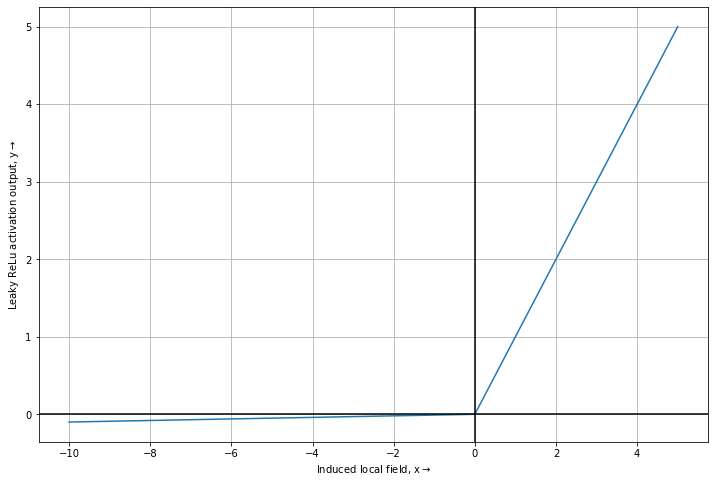

In [16]:
def leakyrelu(x: np.ndarray):
    out = np.where(x > 0, x, x * 0.01)

    return out

x = np.asarray([[-10,-5,-2,-1, 0, 1,2,5]])
output=list()
print("Leaky ReLu implementation output:")
for i in x:
    output.append(list(leakyrelu(i)))
print(output)

plt.figure(figsize=(12,8))
plt.plot(x[0], output[0])
plt.xlabel(r"Induced local field, x$\rightarrow$")
plt.ylabel(r"Leaky ReLu activation output, y$\rightarrow$")
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.grid()

## Question: Build a Swish Activation function [10 points]

Details of the swish activation function can be found in section 4 of the paper [SEARCHING FORACTIVATIONFUNCTIONS](https://arxiv.org/pdf/1710.05941.pdf)

Swish(x) = x * sigmoid(𝛽 * x)

The original paper suggest 𝛽=1 provides better results

Swish implementation output (with beta = 1):
[[-0.00045397868702434395, -0.03346425462142428, -0.2384058440442351, -0.2689414213699951, 0.0, 0.7310585786300049, 1.7615941559557646, 4.966535745378576, 9.999546021312977]]

Swish implementation output (with beta = 5):
[[-1.928749847963918e-21, -6.943971932385572e-11, -9.079573740486879e-05, -0.0066928509242848554, 0.0, 0.9933071490757153, 1.9999092042625952, 4.99999999993056, 10.0]]

Swish implementation output (with beta = 0.5):
[[-0.06692850924284856, -0.37929090010621774, -0.5378828427399902, -0.3775406687981454, 0.0, 0.6224593312018546, 1.4621171572600098, 4.620709099893783, 9.933071490757152]]

Swish implementation output (with beta = 0.1):
[[-2.6894142136999513, -1.8877033439907271, -0.9003320053750443, -0.47502081252106, 0.0, 0.52497918747894, 1.099667994624956, 3.112296656009273, 7.310585786300049]]


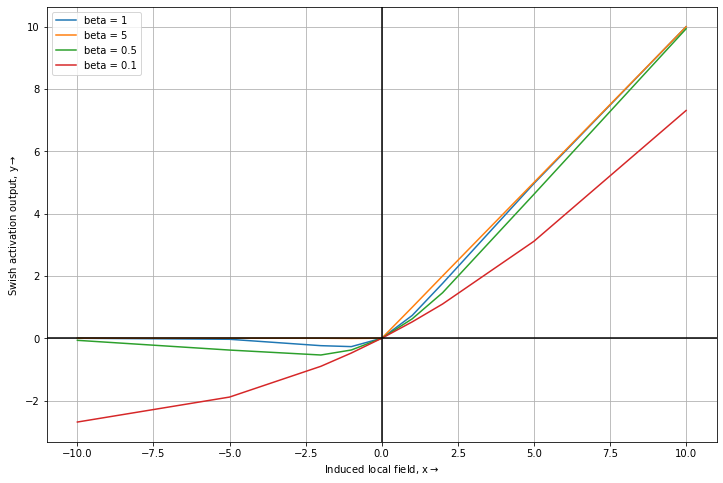

In [17]:
def sigmoid(x: np.ndarray):
    return 1/(1+np.exp(-x))

def swish(x: np.ndarray,
          beta: float):
    out = x * sigmoid(beta*x)

    return out


x = np.asarray([[-10,-5,-2,-1, 0, 1,2,5,10]])
beta = 1
plt.figure(figsize=(12,8))
output=list()

print("Swish implementation output (with beta = 1):")
for i in x:
    output.append(list(swish(i, beta)))
print(output)
plt.plot(x[0], output[0], label='beta = 1')

beta = 5
output=list()
print("\nSwish implementation output (with beta = 5):")
for i in x: 
    output.append(list(swish(i, beta)))
print(output)
plt.plot(x[0], output[0], label='beta = 5')

beta = 0.5
output=list()
print("\nSwish implementation output (with beta = 0.5):")
for i in x: 
    output.append(list(swish(i, beta)))
print(output)
plt.plot(x[0], output[0], label='beta = 0.5')

beta = 0.1
output=list()
print("\nSwish implementation output (with beta = 0.1):")
for i in x: 
    output.append(list(swish(i, beta)))
print(output)
plt.plot(x[0], output[0], label='beta = 0.1')

plt.xlabel(r"Induced local field, x$\rightarrow$")
plt.ylabel(r"Swish activation output, y$\rightarrow$")
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.grid()
plt.legend()
plt.show()


# Explain a fractional Max pooling function [10 points]

Fractional Max pooling was introduced by the paper [Benjamin Graham, Fractional Max-Pooling](https://arxiv.org/abs/1412.6071)

Explain below the difference between normal max pooling and fractional max pooling ?

* Disjoint nature of pooling regions and since size decreases rapidly, stacks of back-to-back CNNs are needed to build deep networks --> Shortcomings of MP2.

* The idea of FMP is to reduce the spatial size of the image by a factor of α with 1 < α < 2. Like stochastic pooling, FMP introduces a degree of randomness to the pooling process.

* In FMP, pooling regions can be chosen in a random or pseudorandom manner. Pooling regions can be disjoint or overlapping.

* In case of a normal 2 x 2 Maxpooling the input feature map is halved which results in halving the important features where as Fractional Max Pooling reduces the features by $\sqrt[n]{2}$ which results in slowing down the reduction of featues by n times. n decides the spped at which the feature reduction is controlled.

* Fractional max pooling is slightly different than regular max pooling. In regular max pooling, you downsize an input set by taking the maximum value of smaller N x N subsections of the set (often 2x2), and try to reduce the set by a factor of N, where N is an integer. Fractional max pooling, as you might expect from the word "fractional", means that the overall reduction ratio N does not have to be an integer. The sizes of the pooling regions are generated randomly but are fairly uniform.

* Max-pooling act on the hidden layers of the network, reducing their size by an integer multiplicative factor α. This reduces 75% of the data that build into the network a degree of invariance with respect to translations and elastic distortions. 

* However, if you simply alternate convolutional layers with max-pooling layers, performance is limited due to the rapid reduction in spatial size, and the disjoint nature of the pooling regions. In fractional maxpooling α is allowed to take non-integer values. This type of max-pooling is stochastic as there are lots of different ways of constructing suitable pooling regions. Fractional max-pooling reduces overfitting on a variety of datasets as discussed in the paper on CIFAR10.

* Pseudorandom approach generates more stable pooling regions. Random FMP is good on its own but may underfit when combined with dropout or training data augmentation. Overlapping FMP performs better than disjoint FMP.


References: 
1. https://arxiv.org/pdf/1412.6071.pdf
2. https://gist.github.com/shagunsodhani/ccfe3134f46fd3738aa0
 

## Total hours spent

Please report the total time invested in solving the assignment below

In [ ]:
total_time_invested = 11